<a href="https://colab.research.google.com/github/z466499903/AIlearn/blob/main/%E9%B8%A2%E5%B0%BE%E8%8A%B1%E5%88%86%E7%B1%BB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
from sklearn import datasets
import pandas as pd
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

In [42]:
x_data = datasets.load_iris().data
y_data = datasets.load_iris().target
df = pd.DataFrame(x_data, columns=["花萼长","花萼宽","花瓣长","花瓣宽"])
pd.set_option("display.unicode.east_asian_width",True)
df["类别"] = y_data
df

,花萼长,花萼宽,花瓣长,花瓣宽,类别
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


分割训练数据集和测试数据
训练数据集和测试数据集永不相交

In [43]:
np.random.seed(116)
np.random.shuffle(x_data)
np.random.seed(116)
np.random.shuffle(y_data)
tf.random.set_seed(116)

In [44]:
x_train = x_data[:-30]
y_train = y_data[:-30]
x_test = x_data[-30:]
y_test = y_data[-30:]
# 转换类型
x_train = tf.cast(x_train,tf.float32)
x_test = tf.cast(x_test,tf.float32)

In [45]:
train_db = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(32)
test_db = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(32)

定义神经网络中所有可训练参数

In [46]:
w1 = tf.Variable(tf.random.truncated_normal([4,3], stddev=0.1,seed=1)) # [4,3] 表示输入特征为 4项，只用一层网络， 输出节点为3
b1 = tf.Variable(tf.random.truncated_normal([3],stddev=0.1, seed=1)) # [3]必须与输出相同

In [47]:
lr = 0.1 # 学习率
train_loss_results = [] # 记录每轮的loss为以后画曲线
test_acc = [] # 记录每轮的acc
epoch = 500 # 循环500次
loss_all = 0 # 每轮分4个step，loss_all 记录四个step生成的4个loss的和

epoch0,loss0.2821310982108116
Test acc: 0.16666666666666666
epoch1,loss0.5367272384464741
Test acc: 0.16666666666666666
epoch2,loss0.7624297477304935
Test acc: 0.16666666666666666
epoch3,loss0.9727137386798859
Test acc: 0.16666666666666666
epoch4,loss1.1721363887190819
Test acc: 0.16666666666666666
epoch5,loss1.3608727678656578
Test acc: 0.5
epoch6,loss1.5393857657909393
Test acc: 0.5333333333333333
epoch7,loss1.7086145244538784
Test acc: 0.5333333333333333
epoch8,loss1.8696912564337254
Test acc: 0.5333333333333333
epoch9,loss2.023738093674183
Test acc: 0.5333333333333333
epoch10,loss2.1717653535306454
Test acc: 0.5333333333333333
epoch11,loss2.314638387411833
Test acc: 0.5333333333333333
epoch12,loss2.4530797991901636
Test acc: 0.5333333333333333
epoch13,loss2.587685873731971
Test acc: 0.5333333333333333
epoch14,loss2.718946600332856
Test acc: 0.5333333333333333
epoch15,loss2.847264815121889
Test acc: 0.5333333333333333
epoch16,loss2.9729727748781443
Test acc: 0.5333333333333333
epoch

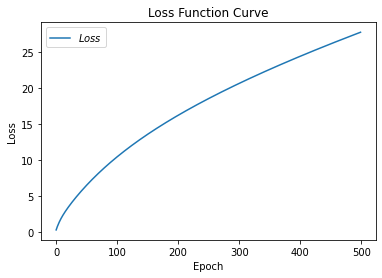

In [48]:
for epoch in range(epoch): # 数据集级别的循环，每个epoth循环一次数据集
  for step, (x_train, y_train) in enumerate(train_db): # batch 级别的循环每个step循环
    with tf.GradientTape() as tape: # with 结构记录梯度信息
      y = tf.matmul(x_train, w1) + b1 # 神经网络乘加运算信息
      y = tf.nn.softmax(y) # 使输出y符合概率分布
      y_ = tf.one_hot(y_train, depth=3) # 将标签值转换为独热码格式，方便计算loss和acc
      loss = tf.reduce_mean(tf.square(y_ - y)) # 采用均方差损失函数mes=mean
      loss_all += loss.numpy() # 将每个step计算的loss累加
    # 计算loss对各个参数的梯度
    grads = tape.gradient(loss, [w1, b1])
    # 实现梯度更新 w1 = w1 - lr * w1_grad b =b - lr * b_grad
    w1.assign_sub(lr*grads[0])
    b1.assign_sub(lr*grads[1])
  print(f"epoch{epoch},loss{loss_all/4}")
  train_loss_results.append(loss_all/4)
  losss_all = 0
  
  # 测试部分
  total_correct, total_number = 0, 0
  for x_test, y_test in test_db:
    # 使用更新后的参数进行测试
    y = tf.matmul(x_test, w1) + b1
    y = tf.nn.softmax(y)
    pred = tf.argmax(y, axis=1)
    # 将pred转换为y_test的数据类型
    pred = tf.cast(pred, dtype=y_test.dtype)
    # 若分类正确，则correct=1，否则为0，将bool类型结果转换为int型
    correct = tf.cast(tf.equal(pred,y_test),dtype=tf.int32)
    # 将每个batch的correct数加起来
    correct = tf.reduce_sum(correct)
    # 将所有batch中的correct数加起来
    total_correct += int(correct)
    total_number += x_test.shape[0]
  
  # 总的准确率等于total_correct /total_number
  acc = total_correct / total_number
  test_acc.append(acc)
  print(f"Test acc: {acc}")

plt.title("Loss Function Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(train_loss_results,label="$Loss$")
plt.legend()
plt.show()

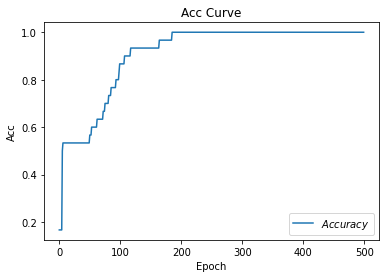

In [49]:
plt.title("Acc Curve")
plt.xlabel("Epoch")
plt.ylabel("Acc")
plt.plot(test_acc, label="$Accuracy$")
plt.legend()
plt.show()